In [28]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    accuracy_score,
    classification_report,
    confusion_matrix,
)

In [2]:
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
print(x)
print(y)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
[0 0 0 0 1 1 1 1 1 1]


In [3]:
model = LogisticRegression(solver="liblinear", random_state=1)

In [4]:
model

LogisticRegression(random_state=1, solver='liblinear')

In [5]:
model.fit(x, y)

LogisticRegression(random_state=1, solver='liblinear')

In [6]:
model.classes_

array([0, 1])

In [7]:
print(model.intercept_, model.coef_)

[-1.04608067] [[0.51491375]]


In [8]:
model.predict(x)

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [9]:
model.predict_proba(x)

array([[0.74002157, 0.25997843],
       [0.62975524, 0.37024476],
       [0.5040632 , 0.4959368 ],
       [0.37785549, 0.62214451],
       [0.26628093, 0.73371907],
       [0.17821501, 0.82178499],
       [0.11472079, 0.88527921],
       [0.07186982, 0.92813018],
       [0.04422513, 0.95577487],
       [0.02690569, 0.97309431]])

In [13]:
model.predict_proba(x)[:, 1]

array([0.25997843, 0.37024476, 0.4959368 , 0.62214451, 0.73371907,
       0.82178499, 0.88527921, 0.92813018, 0.95577487, 0.97309431])

In [14]:
model.predict_proba(x)[:, 1] > 0.5

array([False, False, False,  True,  True,  True,  True,  True,  True,
        True])

In [15]:
(model.predict_proba(x)[:, 1] > 0.5).astype(int)

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [18]:
(model.predict_proba(x)[:, 1] > 0.7).astype(int)

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [20]:
model.score(x, y)

0.9

In [22]:
y_pred = model.predict(x)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [23]:
accuracy_score(y, y_pred)

0.9

#### Confusion Matrix


- TP: True Positive: Predict True, Actual True
- TN: True Negative: Predict False, Actual False
- FP: False Positive: Predict True, Actual False
- FN: False Negative: Predict False, Actual True


```
Scikit-Learn
|        ||       |  Prediction   |
-----------------------------------
|        ||       |   0   |   1   |
| Actual ||   0   |  TN   |  FP   |
|        ||   1   |  FN   |  TP   |
```

```
Wikipedia
|        ||       |  Prediction   |
-----------------------------------
|        ||       |   1   |   0   |
| Actual ||   1   |  TP   |  FN   |
|        ||   0   |  FP   |  TN   |
```


In [25]:
y

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [26]:
y_pred

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [29]:
cm = confusion_matrix(y, y_pred)
cm

array([[3, 1],
       [0, 6]])

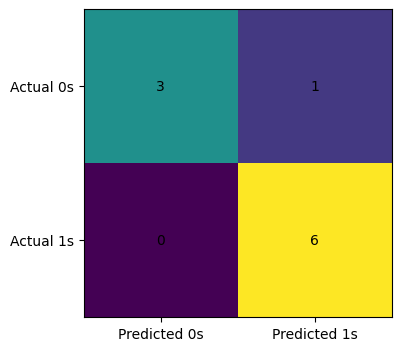

In [51]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=("Predicted 0s", "Predicted 1s"))
ax.yaxis.set(ticks=(0, 1), ticklabels=("Actual 0s", "Actual 1s"))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha="center", va="center")

plt.show()

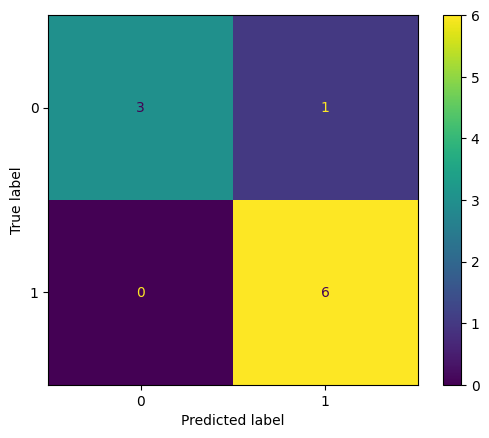

In [60]:
dist = ConfusionMatrixDisplay(cm)
dist.plot()

plt.show()

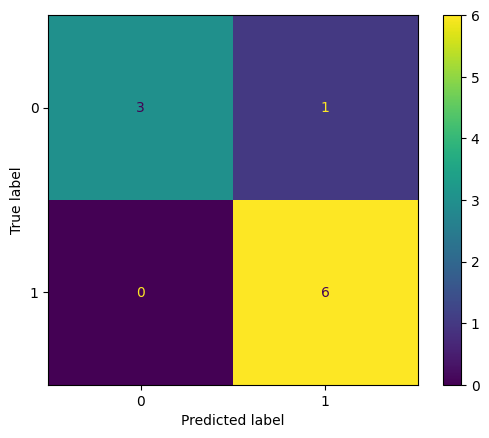

In [66]:
dist.plot()

- Precision: How many items retrieved are relevant? (dari yg kita predict 1): TP / (TP + FP)
- Recall: How many relevant items are retrieved? (dari yg actual 1): TP / (TP + FN)


In [67]:
precision_value = 6 / (6 + 1)
recall_value = 6 / (6 + 0)
print(f"precision: {precision_value}")
print(f"recall: {recall_value}")

precision: 0.8571428571428571
recall: 1.0


In [ ]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10

